# Neutral mutations

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [3]:
title_pairs = [["T42A", "A42T"], ["Y29A", "A29Y"], ["W38F", "F38W"], ["W44F", "F44W"], ["Y29F", "F29Y"]]
# title_pairs = [["T42A", "-(A42T)"], ["Y29A", "-(A29Y)"], ["W44F", "-(F44W)"], ["Y29F", "-(F29Y)"]]
dir_num = 8
subdirs = [19, 21, 23, 25, 27]
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [5]:
title_pairs = [["T42A"], ["Y29A"], ["W38F"], ["W44F"], ["Y29F"]]
dir_num = 8
subdirs = [19, 21, 23, 25, 27]
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [6]:
to_plot

[['T42', 'A42', 2.4328469615407884, 0.24892997839026484, 0.4963751038140358],
 ['Y29', 'A29', 3.3382526750482033, 0.3214616490096917, 0.5101961325586348],
 ['W38', 'F38', 1.253413014869263, 0.3678498044945586, 0.795109027190175],
 ['W44', 'F44', 0.7528280141613972, 0.3128272250919464, 0.6360138700444808],
 ['Y29', 'F29', 1.012049714351522, 0.07680867216931679, 0.16852185170926248]]

In [7]:
d = {'WT': 19.0, 'F29': 19.1, 'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0}

In [15]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['T42', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['Y29', d['WT']*-1, 0])
        experiment.append(['W38', d['WT']*-1, 0])
        experiment.append(['W44', d['WT']*-1, 0])
        experiment.append(['Y29', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [16]:
experiment

[['T42', -19.0, 0],
 ['Y29', -19.0, 0],
 ['W38', -19.0, 0],
 ['W44', -19.0, 0],
 ['Y29', -19.0, 0],
 ['F29', -19.1, 0],
 ['A29', -15.6, 0],
 ['F38', -17.4, 0],
 ['A42', -17.2, 0],
 ['F44', -19.0, 0]]

In [12]:
dir_num

8

In [17]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_neutral.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [18]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [19]:
fe = wrangle.FEMap(f'/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_neutral.csv')

Graph is not connected enough to compute absolute values


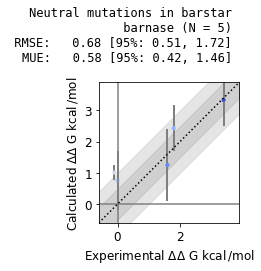

In [20]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Neutral mutations in barstar', units=r'$\mathrm{kcal\,/mol}$', filename=f'/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_neutral.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version